### Notebook sur les données "Cancer" (Gaufreteau Simon / Gassion Axel)


## Chargements des bibliothèques

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#import graphviz

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn import metrics
from sklearn import svm
from dtreeviz.trees import dtreeviz
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
print("Load OK")

Load OK


## Chargement des données

In [5]:
df = pd.read_csv("./data/data_cancer.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Nettoyage des données

In [6]:
# Delete useless axis
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
# size of the dataframe
len(df)

569

In [8]:
# Types of diagnosis
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
# Changes diagnosis into 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Stats on data
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

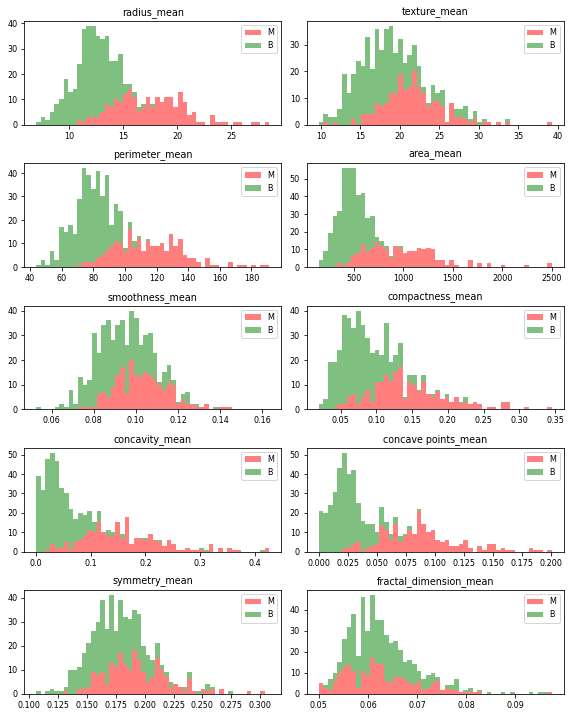

In [12]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### Notes
On peut voir des différences claires sur les paramètres suivants :
- radius
- perimeter
- area
- concavity
- concave_points

Le reste des paramètres ne présente pas de distinction claire. On peut donc penser que les paramètres présentant des différences seront ceux que nous utiliserons après la sélection de variable.
Nous vérifierons ceci dans quelques étapes.



## Entrainement
### Train et test sets

In [13]:
X=df.iloc[:,1:11].values
Y=df['diagnosis'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=1)

### Fonction de test des classifieurs

In [14]:
# Fonction d'affichage des résultats
def getModelResult(model,model_type,X_train,X_test,Y_train,Y_test,fit=True):
    if(fit):
        model.fit(X_train,Y_train)
    Y_res=model.predict(X_test)
    print("Pour un {model}".format(model=model_type))
    print(confusion_matrix(Y_test,Y_res))
    print("Accuracy = {0:.3f}, Précision = {1:.3f}, F-Mesure = {1:.3f}\n".format(accuracy_score(Y_test,Y_res),precision_score(Y_test,Y_res),f1_score(Y_test,Y_res)))

# Tous les classifiers que nous testons
def classifiers(X_train,X_test,Y_train,Y_test,random_state=1):
    DecTree=DecisionTreeClassifier(criterion="gini", random_state=random_state)
    getModelResult(DecTree,"DecisionTree",X_train,X_test,Y_train,Y_test)

    KN=KNeighborsClassifier(n_neighbors=5)
    getModelResult(KN,"K-Neighbors",X_train,X_test,Y_train,Y_test)

    MLP=MLPClassifier(hidden_layer_sizes=(50,20),random_state=random_state)
    getModelResult(MLP,"MLP",X_train,X_test,Y_train,Y_test)

    RFC = RandomForestClassifier(n_estimators=100,random_state=random_state)
    getModelResult(RFC,"Random Forest",X_train,X_test,Y_train,Y_test)

    SVC = svm.SVC(random_state=random_state)
    getModelResult(SVC,"SVC",X_train,X_test,Y_train,Y_test)


### Scaling des données

In [15]:
SS=StandardScaler()
SS.fit(X_train)
X_train_norm=SS.transform(X_train)
X_test_norm=SS.transform(X_test)

### Test des classifieurs

In [16]:
classifiers(X_train_norm,X_test_norm,Y_train,Y_test,random_state=1)

Pour un DecisionTree
[[170  12]
 [ 17  86]]
Accuracy = 0.898, Précision = 0.878, F-Mesure = 0.878

Pour un K-Neighbors
[[167  15]
 [  9  94]]
Accuracy = 0.916, Précision = 0.862, F-Mesure = 0.862

Pour un MLP
[[169  13]
 [ 11  92]]
Accuracy = 0.916, Précision = 0.876, F-Mesure = 0.876

Pour un Random Forest
[[166  16]
 [ 11  92]]
Accuracy = 0.905, Précision = 0.852, F-Mesure = 0.852

Pour un SVC
[[172  10]
 [ 13  90]]
Accuracy = 0.919, Précision = 0.900, F-Mesure = 0.900



### Génération des PCA

In [14]:
acp=PCA(n_components=3)
acp.fit(X_train_norm)

X_train_pca=np.concatenate((X_train_norm,acp.transform(X_train_norm)),axis=1)
X_test_pca=np.concatenate((X_test_norm,acp.transform(X_test_norm)),axis=1)

### Test avec PCA

In [15]:
classifiers(X_train_pca,X_test_pca,Y_train,Y_test,random_state=1)

Pour un DecisionTree
[[169  13]
 [ 23  80]]
Accuracy = 0.874, Précision = 0.860, F-Mesure = 0.860

Pour un K-Neighbors
[[165  17]
 [  9  94]]
Accuracy = 0.909, Précision = 0.847, F-Mesure = 0.847

Pour un MLP
[[170  12]
 [ 11  92]]
Accuracy = 0.919, Précision = 0.885, F-Mesure = 0.885

Pour un Random Forest
[[169  13]
 [ 11  92]]
Accuracy = 0.916, Précision = 0.876, F-Mesure = 0.876

Pour un SVC
[[171  11]
 [ 13  90]]
Accuracy = 0.916, Précision = 0.891, F-Mesure = 0.891



Note : le perceptron multi-couche semble être le meilleur modèle ici, nous l'utiliserons par la suite pour la sélection de variable

### Sélection de variables

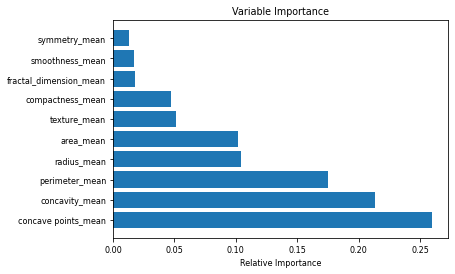

Feature importance :

concave points_mean       0.259622
concavity_mean            0.213016
perimeter_mean            0.175346
radius_mean               0.104567
area_mean                 0.101380
texture_mean              0.051388
compactness_mean          0.047394
fractal_dimension_mean    0.017939
smoothness_mean           0.016744
symmetry_mean             0.012604
dtype: float64


In [16]:
clf = RandomForestClassifier(n_estimators=100,random_state=1)
clf.fit(X_train_norm, Y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features=df.columns[1:11]
#print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

# Serie with the importances
featimp = pd.Series(importances, index=features).sort_values(ascending=False)
print("Feature importance :\n")
print(featimp)


### Utilisation du meilleur classifieur (MLP) sur les paramètres les plus importants

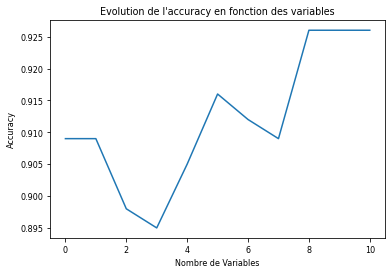

In [19]:
MLP=MLPClassifier(hidden_layer_sizes=(50,20),random_state=1)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
 X1_f = X_train_norm[:,sorted_idx[:f+1]]
 X2_f = X_test_norm[:,sorted_idx[:f+1]]
 MLP.fit(X1_f,Y_train)
 YMLP=MLP.predict(X2_f)
 scores[f]=np.round(accuracy_score(Y_test,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

### Récupération des paramètres les plus importants

In [20]:
features=df.columns[1:11]
selected_features=sorted_idx[:np.argmax(scores)+1]
selected_features

array([7, 6, 2, 0, 3, 1, 5, 9, 4], dtype=int64)

### Résumé des formats de données

In [ ]:
print(X_train.shape)
print(X_train_norm.shape)
print(X_train_pca.shape)
print(X_train_norm[:,selected_features].shape)

(284, 10)
(284, 10)
(284, 13)
(284, 9)


### Visualisation d'un DecisionTree (un seul paramètre)

In [ ]:
DecTree=DecisionTreeClassifier(criterion="gini", random_state=1)
best_param = [selected_features[0]]
DecTree.fit(X_train_norm[:,best_param],Y_train)
Y_res=DecTree.predict(X_test_norm[:,best_param])
getModelResult(DecTree,"Decision Tree",X_train_norm[:,best_param],X_test_norm[:,best_param],Y_train,Y_test)

text_representation = export_text(DecTree,feature_names=[features[best_param].all()])
print(text_representation)

Pour un Decision Tree
[[157  25]
 [ 17  86]]
Accuracy = 0.853, Précision = 0.775, F-Mesure = 0.775

|--- concave points_mean <= 0.15
|   |--- concave points_mean <= -0.47
|   |   |--- concave points_mean <= -0.67
|   |   |   |--- class: 0
|   |   |--- concave points_mean >  -0.67
|   |   |   |--- concave points_mean <= -0.66
|   |   |   |   |--- class: 1
|   |   |   |--- concave points_mean >  -0.66
|   |   |   |   |--- concave points_mean <= -0.53
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- concave points_mean >  -0.53
|   |   |   |   |   |--- concave points_mean <= -0.53
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- concave points_mean >  -0.53
|   |   |   |   |   |   |--- class: 0
|   |--- concave points_mean >  -0.47
|   |   |--- concave points_mean <= -0.47
|   |   |   |--- class: 1
|   |   |--- concave points_mean >  -0.47
|   |   |   |--- concave points_mean <= -0.13
|   |   |   |   |--- concave points_mean <= -0.34
|   |   |   |   |   |--- concave po

### Utilisation des paramètres les plus importants sur le MLP

In [23]:
MLP=MLPClassifier(hidden_layer_sizes=(50,20),random_state=1)
MLP.fit(X_train_norm[:,selected_features],Y_train)
Y_res=MLP.predict(X_test_norm[:,selected_features])
print(confusion_matrix(Y_test,Y_res))
print("Accuracy = {0:.3f}, Précision = {1:.3f}, F-Mesure = {1:.3f}\n".format(accuracy_score(Y_test,Y_res),precision_score(Y_test,Y_res),f1_score(Y_test,Y_res)))

[[170  12]
 [  9  94]]
Accuracy = 0.926, Précision = 0.887, F-Mesure = 0.887



### Recherche des meilleurs paramètres pour le MLP (2 couches cachées)

#### NOTE : Ce code prend **beaucoup** de temps à s'exécuter (10 min environ), nous vous conseillons de plutôt regarder directement les résultats

In [26]:
x = np.arange(10,100,10)
y = np.arange(10,100,10)
hidden_layers = np.empty((9,9),object)
hidden_layers[:] = [[(a,b) for b in x] for a in y]
hl = hidden_layers.ravel()
param={
    'hidden_layer_sizes':hl,
    'activation':['logistic','tanh','relu']
    }
model=MLPClassifier(random_state=1)
GS=GridSearchCV(model,param,scoring='accuracy',cv=10)
grid=GS.fit(X_train_norm[:,selected_features],Y_train)
print(grid.best_params_)
print(grid.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 80)}
0.9683497536945811


### Test du "meilleur" MLP (2 couches)

In [27]:
best_mlp = grid.best_estimator_
print("Meileur classifieur :")
print(best_mlp)
getModelResult(best_mlp,"MLP (best)",X_train_norm[:,selected_features],X_test_norm[:,selected_features],Y_train,Y_test)

print("Meileur classifieur (sur PCA) :")
getModelResult(best_mlp,"MLP (best)",X_train_pca,X_test_pca,Y_train,Y_test)

Meileur classifieur :
MLPClassifier(hidden_layer_sizes=(20, 80), random_state=1)
Pour un MLP (best)
[[168  14]
 [  8  95]]
Accuracy = 0.923, Précision = 0.872, F-Mesure = 0.872

Meileur classifieur (sur PCA) :
Pour un MLP (best)
[[170  12]
 [  8  95]]
Accuracy = 0.930, Précision = 0.888, F-Mesure = 0.888



### Avec 1 couche cachée

In [24]:
x = np.arange(10,100,10)
param={
    'hidden_layer_sizes':x,
    'activation':['logistic','tanh','relu']
    }
model=MLPClassifier(random_state=1)
GS=GridSearchCV(model,param,scoring='accuracy',cv=10)
grid=GS.fit(X_train_norm[:,selected_features],Y_train)
print(grid.best_params_)
print(grid.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': 90}
0.957758620689655


### Test du "meilleur" MLP (1 couche)

In [25]:
best_mlp = grid.best_estimator_
print("Meileur classifieur :")
print(best_mlp)
getModelResult(best_mlp,"MLP (best)",X_train_norm[:,selected_features],X_test_norm[:,selected_features],Y_train,Y_test)

print("Meileur classifieur (sur PCA) :")
getModelResult(best_mlp,"MLP (best)",X_train_pca,X_test_pca,Y_train,Y_test)


Meileur classifieur :
MLPClassifier(hidden_layer_sizes=90, random_state=1)
Pour un MLP (best)
[[172  10]
 [  8  95]]
Accuracy = 0.937, Précision = 0.905, F-Mesure = 0.905

Meileur classifieur (sur PCA) :
Pour un MLP (best)
[[172  10]
 [ 10  93]]
Accuracy = 0.930, Précision = 0.903, F-Mesure = 0.903



## Conclusion sur les modèles testés
- Le modèle Perceptron Multi-Couche optimisé (1 couche cachée) executé sur les données PCA nous donne les résultats suivants :
  - Meilleurs paramètres : `Accuracy = 0.937, Précision = 0.905, F-Mesure = 0.905`
  - PCA : `Accuracy = 0.930, Précision = 0.903, F-Mesure = 0.903`

-  Pour rappel, les résultats d'un MLP avec des paramètres arbitraires sont les suivants :
   - Données normalisées : `Accuracy = 0.916, Précision = 0.876, F-Mesure = 0.876`
   - Meilleurs paramètres : `Accuracy = 0.926, Précision = 0.887, F-Mesure = 0.887`


Nous avons choisi de nous pencher particuièrement sur le MLP dans ce notebook puisqu'il présentait les meilleurs résultats pour les données de bases. 
Il est tout à fait possible d'utiliser notre méthode sur d'autres modèles.

## Etude sur la taille des samples

### Calculs

In [31]:
all_results = []

for test_size_range in range(10,90,1):
    X_train, X_test, y_train, y_test = train_test_split(
                    df.drop('diagnosis', axis=1),
                    df['diagnosis'],
                    test_size=test_size_range,
                    random_state=42)

    print("Shape of training set:", X_train.shape)
    print("Shape of test set:", X_test.shape)
    
    #Fit_transform
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)
    
    #K-Neighbors algorithm
    error_rate = []

    for i in range(1,42):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    
    
    # plt.figure(figsize=(12,6))
    # plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
    #             marker='o', markersize=10, markerfacecolor='b')
    # plt.title('Error_Rate vs K-value')
    # plt.show()
        
    
    min_neighbour = error_rate.index(min(error_rate))
    i=1
    while min_neighbour == 0: 
        if error_rate[1] == min(error_rate):
            min_neighbour = 1
        else:
            error_rate.remove(min(error_rate))
            min_neighbour = error_rate.index(min(error_rate)) + i
            i+=1
                
    print("La meilleure valeur de voisin : ", min_neighbour)

    knn = KNeighborsClassifier(n_neighbors=min_neighbour+1)
    knn.fit(X_train, y_train)
    predictions2 = knn.predict(X_test)
    # print(confusion_matrix(y_test, predictions2))
    # print("\n")
    # print(classification_report(y_test, predictions2))

    knn_model_acc = accuracy_score(y_test, predictions2)
    all_results.append(knn_model_acc)
    print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Shape of training set: (559, 30)
Shape of test set: (10, 30)
La meilleure valeur de voisin :  1
Accuracy of K Neighbors Classifier Model is:  0.9
Shape of training set: (558, 30)
Shape of test set: (11, 30)
La meilleure valeur de voisin :  2
Accuracy of K Neighbors Classifier Model is:  0.9090909090909091
Shape of training set: (557, 30)
Shape of test set: (12, 30)
La meilleure valeur de voisin :  2
Accuracy of K Neighbors Classifier Model is:  0.9166666666666666
Shape of training set: (556, 30)
Shape of test set: (13, 30)
La meilleure valeur de voisin :  2
Accuracy of K Neighbors Classifier Model is:  0.9230769230769231
Shape of training set: (555, 30)
Shape of test set: (14, 30)
La meilleure valeur de voisin :  2
Accuracy of K Neighbors Classifier Model is:  0.8571428571428571
Shape of training set: (554, 30)
Shape of test set: (15, 30)
La meilleure valeur de voisin :  1
Accuracy of K Neighbors Classifier Model is:  0.8666666666666667
Shape of training set: (553, 30)
Shape of test se

### Résultats

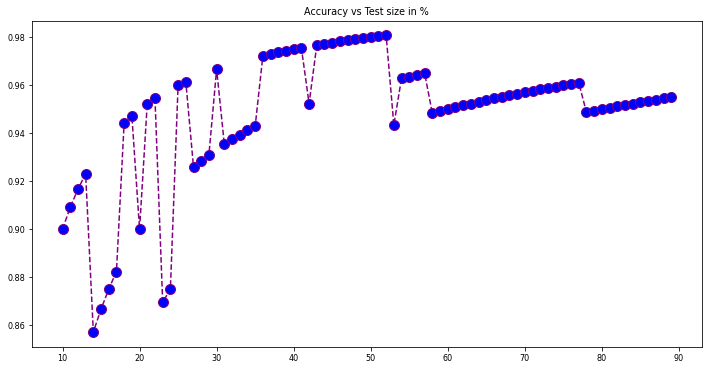

Best accuracy :  52 % of the sample is in the test set
Worst accuracy :  14 % of the sample is in the test set
Mean accuracy :  0.9482034193754943
Mean accuracy in  [40:90] :  0.9603917065411127


In [32]:
#print("Tous les résults : ", all_results)
plt.figure(figsize=(12,6))
plt.plot(range(10,90), all_results, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Accuracy vs Test size in %')
plt.show()

print("Best accuracy : ", all_results.index(max(all_results))+10, "% of the sample is in the test set" )
print("Worst accuracy : ", all_results.index(min(all_results))+10, "% of the sample is in the test set" )
print("Mean accuracy : ", sum(all_results)/len(all_results))
print("Mean accuracy in  [40:90] : ", sum(all_results[30:])/len(all_results[30:]))

### Conclusion sur la taille des samples

Après avoir exécuté ces algorithmes, nous pouvons observer que les résultats sont les meilleurs lorsque les deux échantillons sont des taille similaire.
Malgré le fait que la précision ne soit pas le seul critère permettant de juger l'importance de ce paramètre, on voit que cette dernière croit relativement vite puis stagne, et semble moins importante à partir de 60%.
Il parait évident qu'il n'est pas envisageable d'avoir une telle répartition, mais il est intéressant de voir le résultat.
La rapide évolution montre tout de même qu'un échantillon de test représentant au maximum 20% de la taille totale semble suffisant.
Cette petite étude nous a permis de nous rendre compte par nous même de l'influence de la répartition entre les données d'entrainement et de tests.